# QF 625 Introduction to Programming
## Exercise 1 `Questions`

> Hi Team,

> As I mentioned in my class note, the current script contains questions to help you to consolidate your learning up to this point. 

> On the one hand, this will be a good revision of what you have learned from the lessons (and assigned readings). On the other hand, these exercise questions are also designed as a pathway to your learning in the upcoming week’s lessons. 

> It may be that you cannot answer every question. If you are unsure about how to answer a question, look for clues in the assigned readings. I'll give you further guidance to the answers in upcoming weeks’ lessons.

> To maximize your learning, the answers will be given to you in a review session during Lessson 4 on Monday.

### Please import necessary libraries

In [6]:
import pandas as pd

### Please read `data_exercise1.csv`

In [7]:
exercise1 = pd.read_csv("data_exercise1.csv")
exercise1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### ***Now let's clean up the dataset :)***

> The first step in this exercise is figuring out what we need to clean.

### Question 1. Please remove rows of NAN

In [8]:
# Find NAN
nan_df = exercise1[exercise1.isna().any(axis=1)]
display(nan_df.head())

exercise1 = exercise1.dropna(how="all")
exercise1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Question 2. Please remove text in `Order Date` column

In [9]:
exercise1 = exercise1[exercise1["Order Date"].str[0:2]!="Or"]
print(exercise1.head());

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


### Question 3. Please make columns correct type: namely, make `Quantity Ordered` and `Price Each` as numeric data types.

In [13]:
print(exercise1["Quantity Ordered"])
exercise1["Quantity Ordered"] = pd.to_numeric(exercise1["Quantity Ordered"])
print(exercise1["Quantity Ordered"])
exercise1["Price Each"] = pd.to_numeric(exercise1["Price Each"])

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int64
0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int64


### ***Let's create additional columns (variables) for your data exploration.***

### Question 4. Please add `Month` column: Create the `Month` from `Order Date` column

In [6]:
exercise1["Month"] = exercise1["Order Date"].str[0:2]
exercise1["Month"] = exercise1["Month"].astype("int32")
exercise1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Question 5. Please add `City` column: Create the `City` from `Purchase Address` column

In [7]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

exercise1["City"] = exercise1["Purchase Address"].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
exercise1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### ***Now, let's explore our data***

### Question 6: What was the best month for the business? How much was earned that month? Please use `Quantity Ordered` and `Price Each` columns to create a new column (variable) `Gross Revenue`.

In [8]:
exercise1["Gross Revenue"] = exercise1["Quantity Ordered"].astype("int") * exercise1["Price Each"].astype("float")

In [9]:
exercise1.groupby(["Month"]).sum()

,Quantity Ordered,Price Each,Gross Revenue
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Question 7. Please create a vertical bar plot that summarizes the monthly gross revenue.

range(1, 13)


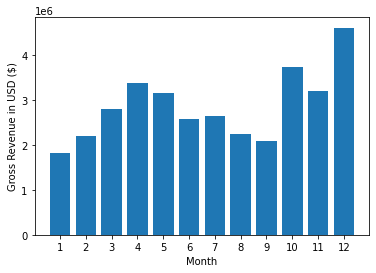

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months, exercise1.groupby(["Month"]).sum()["Gross Revenue"])
plt.xticks(months)
plt.ylabel("Gross Revenue in USD ($)")
plt.xlabel("Month")
plt.show()

### Question 8: What `City` sold the most product based on `Quantity Ordered` and `Gross Revenue`?

In [11]:
exercise1.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Gross Revenue
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


### Question 9. Please visualize the above results with horizontal bar plot.

In [13]:
import matplotlib.pyplot as plt

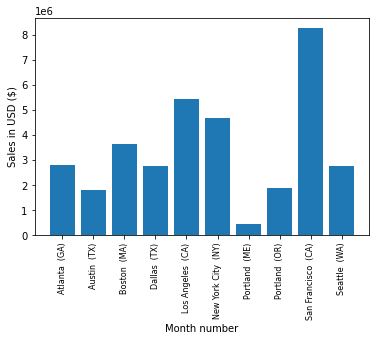

In [16]:
keys = [city for city, df in exercise1.groupby(["City"])]

plt.bar(keys, exercise1.groupby(["City"]).sum()["Gross Revenue"])
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.xticks(keys, rotation="vertical", size=8)
plt.show()

### Question 10: What time should we display ads to maximize likelihood of customer's buying product? Please create a new variable `Hour` from column `Order Date`

In [17]:
# Add hour column
exercise1["Hour"] = pd.to_datetime(exercise1["Order Date"]).dt.hour
exercise1["Minute"] = pd.to_datetime(exercise1["Order Date"]).dt.minute
exercise1["Count"] = 1
exercise1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Gross Revenue,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


### Question 11. Please visualize the results of your analysis above.

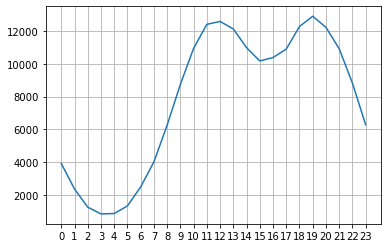

In [18]:
keys = [pair for pair, df in exercise1.groupby(["Hour"])]

plt.plot(keys, exercise1.groupby(["Hour"]).count()["Count"])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### BONUS 1. What products are most often sold together?

In [14]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

NameError: name 'all_data' is not defined

In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


### BONUS 2. What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

> `Thank you for working with the script :)`

In [ ]:
exit()